In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords,wordnet
from bs4 import BeautifulSoup
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
data['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [6]:
#text pre processing
#print random reviews from text
sent_20=data['tweet'].values[20]
print(sent_20)
print("="*70)

sent_500=data['tweet'].values[500]
print(sent_500)
print("="*70)

sent_2000=data['tweet'].values[2000]
print(sent_2000)
print("="*70)

sent_14=data['tweet'].values[14]
print(sent_14)

#Apple #Art #Easter #Dear #Friends If you would like to be published on my channel. Design a face on the Easter Bunny and email it to me as a .png thumbnail. My email : mutita.edibleart@gmail.compic.twitter.com/7JhWphfbGT
Set up almost done :)) #NewTv #Samsung #Black #40" #Massive http://instagram.com/p/dUWESckqlO/
They think the world is gonna end in 2012, but they can barely predict the weather for tomorrow. #ff #friends #gratitude #ipad #iphone
@shaqlockholmes @sam_louise1991 the battery is so painful! I charge it overnight and by lunchtime battery is dead! #HateOrange.


In [7]:
#remove http tags
sent_500=re.sub(r"http\S+","",sent_500)
sent_500

'Set up almost done :)) #NewTv #Samsung #Black #40" #Massive '

In [8]:
#Remove @user
sent_14=re.sub("\S*@\S*\s?", "",sent_14 )
sent_14


'the battery is so painful! I charge it overnight and by lunchtime battery is dead! #HateOrange.'

In [9]:
sent_20=re.sub("\S*@\S*\s?","",sent_20)
sent_20

'#Apple #Art #Easter #Dear #Friends If you would like to be published on my channel. Design a face on the Easter Bunny and email it to me as a .png thumbnail. My email : '

In [10]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
#Remove words with number
sent_500=re.sub("\S*\d\S*","",sent_500)
sent_500

'Set up almost done :)) #NewTv #Samsung #Black  #Massive '

In [12]:
#Remove special chara
sent_500=re.sub("[^A-Za-z0-9]+", " ",sent_500)

In [13]:
sent_500

'Set up almost done NewTv Samsung Black Massive '

In [14]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [15]:
clean_tweet=[]
for sentence in tqdm(data['tweet'].values):
    sentence=re.sub(r"http\S+", "",sentence)
    sentence=re.sub("\S*@\S*\s?", "",sentence)
    sentence=BeautifulSoup(sentence,"lxml").get_text()
    sentence=re.sub("S*\d\S*","",sentence).strip()
    sentence=re.sub("[^A-Za-z0-9]"," ",sentence)
    sentence=" ".join(x.lower() for x in sentence.split() if x.lower() not in stopwords)
    clean_tweet.append(sentence.strip())
    

100%|██████████| 7920/7920 [00:01<00:00, 4478.61it/s]


In [16]:
clean_tweet

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone',
 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias',
 'love would go talk makememories unplug relax iphone smartphone wifi connect',
 'wired know george made way iphone cute daventry home',
 'amazing service apple even talk question unless pay stupid support',
 'iphone software update fucked phone big time stupid iphones',
 'happy us instapic instadaily us sony xperia xperiaz',
 'new type c charger cable uk bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipes technology samsunggalaxy iphonex pic twitter com pjiwq',
 'bout go shopping listening music iphone justme music likeforlike followforfollow',
 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor',
 'hey apple make new ipod dont make new color thinner make not crash every five fuckin minite',
 'ha not heavy machinery need really 

# Bag of Words

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()

In [18]:
X=clean_tweet
y=np.array(data['label'])

In [19]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split
X_1,X_test,y_1,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train,X_cv,y_train,y_cv=train_test_split(X_1,y_1,test_size=0.3)

In [21]:
finalX_train=count_vect.fit_transform(X_train)
finalX_cv=count_vect.transform(X_cv)
finalX_test=count_vect.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn import metrics

In [23]:
auc_cv=[]
auc_train=[]
cv_score=[]
K=list(range(1,30,2))
for i in K:
    knn=KNeighborsClassifier(n_neighbors=i,weights='uniform',algorithm='brute',leaf_size=30,p=2,metric='cosine')
    knn.fit(finalX_train,y_train)
    pred=knn.predict_proba(finalX_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,pred))
    pred1=knn.predict_proba(finalX_train)[:,1]
    auc_train.append(roc_auc_score(y_train,pred1))

In [24]:
auc_cv

[0.7336817653890825,
 0.8422548799220712,
 0.8759535049267544,
 0.8896144767899291,
 0.8940916413772432,
 0.8952156157506276,
 0.8938481135963434,
 0.8937788018433179,
 0.8930004495897493,
 0.8927775280056949,
 0.8932327376269154,
 0.8940794649881982,
 0.8931615525832677,
 0.8934453561125474,
 0.8952015660709601]

In [25]:
auc_train

[1.0,
 0.9631501251532917,
 0.9494417099243481,
 0.9410873077203062,
 0.9342066765221384,
 0.9300868723436424,
 0.9245834173288312,
 0.9221345985855158,
 0.9197599758652937,
 0.9181806855152564,
 0.9162925367200319,
 0.914515681959447,
 0.9125559620004369,
 0.9113418770753888,
 0.9097534872130854]

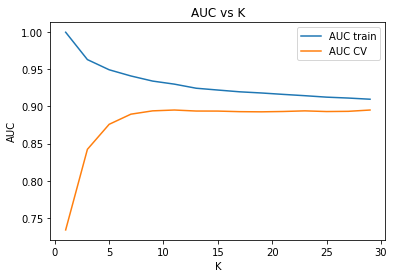

In [26]:
fig=plt.figure()
ax=plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()
    

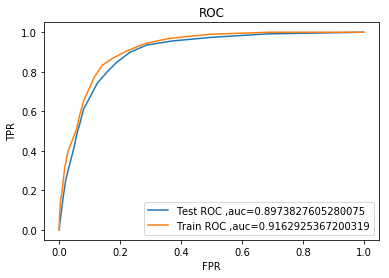

In [27]:
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=21,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(finalX_train,y_train)
predi=knn.predict_proba(finalX_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=knn.predict_proba(finalX_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

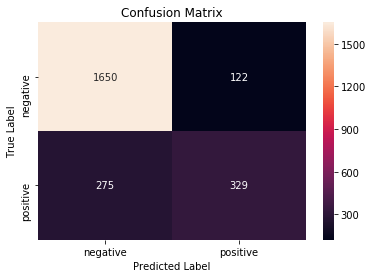

In [28]:
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=21,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(finalX_train,y_train)
predic=knn.predict(finalX_test)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:
test=pd.read_csv('test.csv')

In [30]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [31]:
clean_test_tweet=[]
for sentence in tqdm(test['tweet'].values):
    sentence=re.sub(r"http\S+", "",sentence)
    sentence=re.sub("\S*@\S*\s?", "",sentence)
    sentence=BeautifulSoup(sentence,"lxml").get_text()
    sentence=re.sub("S*\d\S*","",sentence).strip()
    sentence=re.sub("[^A-Za-z0-9]"," ",sentence)
    sentence=" ".join(x.lower() for x in sentence.split() if x.lower() not in stopwords)
    clean_test_tweet.append(sentence.strip())

100%|██████████| 1953/1953 [00:00<00:00, 4259.18it/s]


In [32]:
clean_test_tweet

['hate new iphone upgrade let download apps ugh apple sucks',
 'currently shitting fucking pants apple imac cashmoney raddest swagswagswag',
 'like puts cd roms ipad possible yes block screen',
 'ipod officially dead lost pictures videos concert vet camp hatinglife sobbing',
 'fighting itunes night want music paid',
 'repost repostapp announce apple bourbon',
 'new apple software update really things phone bad things apple',
 'baby iphone iphone gold new apple appleisbest geg nnt aaaaah',
 'confused take time set appointment still waiting minutes fact',
 'fruit tastes better pick apple healthy fruit nyc pic twitter com zuo',
 'con mi buddy edgar buddy friend viviendo taller friendly hug sony smile sonrisa',
 'mymomisgreatbecause always care anything follow mothersday mustfollow mothersday iphone tweet',
 'kiss romance hot movie iphone sex porn lustful mature woman getting nailed intensively mission',
 'holding hope loved one news photography fashion health fail tech ipad iphone funny l

In [33]:
X_test_tweet=clean_test_tweet

In [34]:
finalX_test_tweet=count_vect.transform(X_test_tweet)

In [35]:
finalX_test_tweet

<1953x9867 sparse matrix of type '<class 'numpy.int64'>'
	with 17617 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=21,weights='uniform',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(finalX_train,y_train)
predic=knn.predict(finalX_test_tweet)

In [40]:
predic

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [41]:
test['label']=predic

In [42]:
test.head()

,id,tweet,label
0,7921,I hate the new #iphone upgrade. Won't let me d...,0
1,7922,currently shitting my fucking pants. #apple #i...,1
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",0
3,7924,My ipod is officially dead. I lost all my pict...,1
4,7925,Been fighting iTunes all night! I only want th...,1


In [44]:
test.tail()

,id,tweet,label
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",0
1949,9870,Now Available - Hoodie. Check it out here - ht...,0
1950,9871,There goes a crack right across the screen. If...,1
1951,9872,@codeofinterest as i said #Adobe big time we m...,1
1952,9873,Finally I got it .. thanx my father .. #Samsun...,0


In [45]:
submission=test.drop('tweet',axis=1)

In [46]:
submission


,id,label
0,7921,0
1,7922,1
2,7923,0
3,7924,1
4,7925,1
5,7926,1
6,7927,1
7,7928,0
8,7929,1
9,7930,0


In [47]:
submission.to_csv('final.csv',index=False)

In [48]:
#this gives 80 accuracy on test data using bag of words